<a href="https://colab.research.google.com/github/hollimey/542/blob/main/i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# use pandas library and their dataframe data structure https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
# use pandas library and their dataframe data structure https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
# the pip command installs the library, which will work in Colab
# if using in your own machine, requires the pip package manager to be installed, or use another package manager
!pip install pandas

In [6]:
# import the requests library, which is for making requests over HTTP to websites or APIs
# import the pandas library and rename it as pd for simplicity
import requests
import pandas as pd

In [7]:
# create variable for holding API reponse
response = requests.get("https://data.cityofnewyork.us/api/views/c3uy-2p5r/rows.json")

# fetch data from the API
import json
data = response.json()

In [8]:
# view dataset fields
columns = [col['fieldName'] for col in data['meta']['view']['columns']]
columns

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'unique_id',
 'indicator_id',
 'name',
 'measure',
 'measure_info',
 'geo_type_name',
 'geo_join_id',
 'geo_place_name',
 'time_period',
 'start_date',
 'data_value',
 'message']

In [59]:
# view the types of fields for data column 'name'
df = pd.DataFrame(data['data'], columns=columns)
print(df['name'])

0        Nitrogen dioxide (NO2)
1        Nitrogen dioxide (NO2)
2        Nitrogen dioxide (NO2)
3        Nitrogen dioxide (NO2)
4        Nitrogen dioxide (NO2)
                  ...          
18857    Nitrogen dioxide (NO2)
18858                Ozone (O3)
18859                Ozone (O3)
18860    Nitrogen dioxide (NO2)
18861    Nitrogen dioxide (NO2)
Name: name, Length: 18862, dtype: object


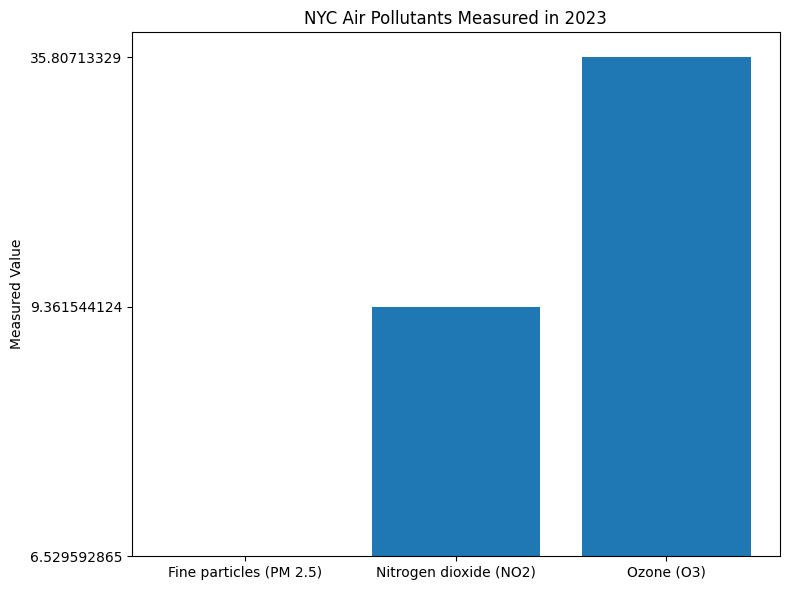

In [60]:
# create bar graph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.DataFrame(data['data'], columns=columns)
# convert 'start_date' to datetime objects
df['start_date'] = pd.to_datetime(df['start_date'])

# filter data for only the year 2023
df_2023 = df[df['start_date'].dt.year == 2023]

# group data by pollutant and get the data value
pollutant_data = df_2023.groupby('name')['data_value'].first().reset_index()

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(pollutant_data['name'], pollutant_data['data_value'])
ax.set_ylabel('Measured Value')
ax.set_title('NYC Air Pollutants Measured in 2023')
plt.tight_layout() # adjust layout to prevent labels from overlapping
plt.show()